Cross-Validation

In [21]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.preprocessing import PolynomialFeatures
from OLS_Ridge import fit_polynomial_mod
from lasso import lasso_reg_mod

In [22]:
# Cross validation
def cross_validation(x, y, degrees=5, lmbda=0, lass=False, n_folds=5, LOO=False):
    
    results_list = []

    if LOO:
        folds = LeaveOneOut()
    else:
        folds = KFold(n_folds, shuffle=True, random_state=42)

    if x.ndim == 1:
        x = x.reshape(-1, 1)

    poly_features = PolynomialFeatures(degrees)
    
    for i, (train_indx, test_indx) in enumerate(folds.split(x)):
        x_train, x_test, y_train, y_test = x[train_indx], x[test_indx], y[train_indx], y[test_indx]

        y_train = y_train.reshape(-1, 1)
        y_test = y_test.reshape(-1, 1)

        X_train = poly_features.fit_transform(x_train)
        X_test = poly_features.transform(x_test)

        if lass:
            result = lasso_reg_mod(X_train, X_test, y_train, y_test, lmbda=lmbda, eta=0.01, n_iter=1000, GD="GD")
        else:
            result = fit_polynomial_mod(X_train, X_test, y_train, y_test, lmbda=lmbda, n_iter=1000, GD=True, momentum=False)

        results_list.append(result)

    avg_results = {
        "train_mse": np.mean([r["train_mse"] for r in results_list]),
        "test_mse": np.mean([r["test_mse"] for r in results_list]),
        "train_r2": np.mean([r["train_r2"] for r in results_list]),
        "test_r2": np.mean([r["test_r2"] for r in results_list])
    }

    return avg_results


In [23]:
from OLS_Ridge import plot_mse_r2_CV, generate_data

In [24]:
def run_experiment_CV(x, y, degrees, lmbda=0, lass=False, n_folds=5, LOO=False):
    results = []
    for fold in n_folds:
        fold_result = cross_validation(x, y, degrees=degrees, lmbda=lmbda, lass=lass, n_folds=fold, LOO=LOO)
        
        fold_result["K-Folds"] = fold
        results.append(fold_result)
    
    return results

In [25]:
n = 50

# Generate data
x, y = generate_data(n, seed=42)

# Number of folds
n_folds = list(range(3, 21))

In [26]:
res_CV_OLS = run_experiment_CV(x, y, degrees=8, lmbda=0, lass=False, n_folds=n_folds, LOO=False)

In [27]:
res_CV_Ridge = run_experiment_CV(x, y, degrees=8, lmbda=0.00001, lass=False, n_folds=n_folds, LOO=False)

In [28]:
res_CV_Lasso = run_experiment_CV(x, y, degrees=8, lmbda=0.001, lass=True, n_folds=n_folds, LOO=False)

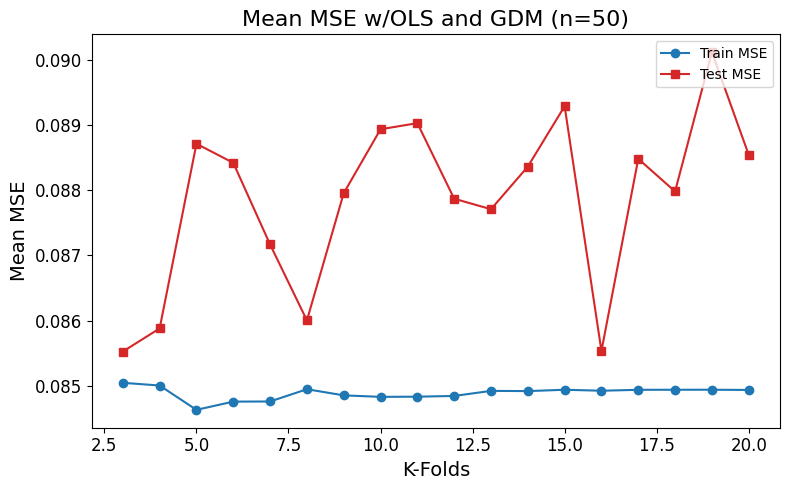

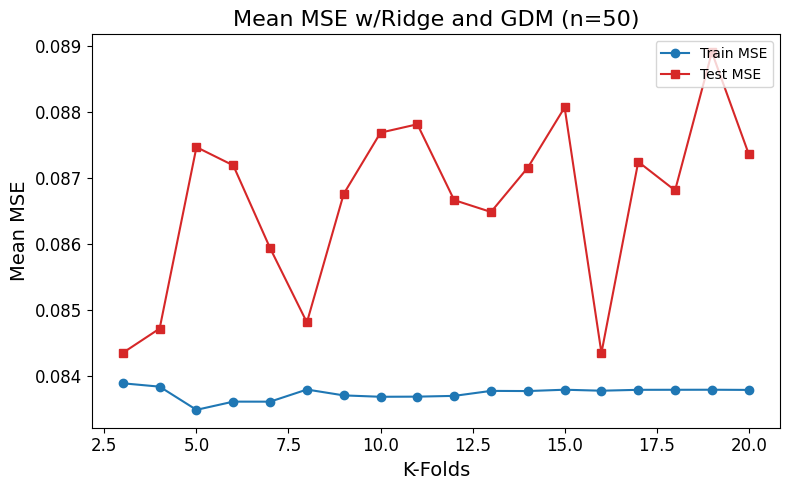

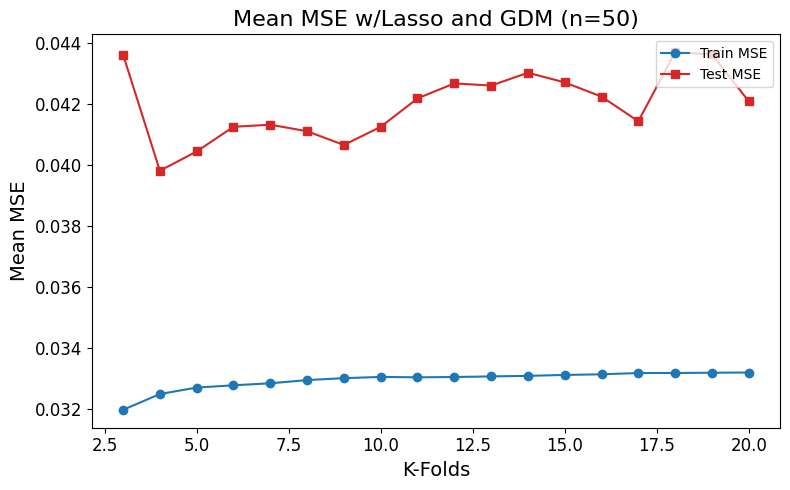

In [29]:
plot_mse_r2_CV(res_CV_OLS, n, GD="OLS and GDM", R2=False)
plot_mse_r2_CV(res_CV_Ridge, n, GD="Ridge and GDM", R2=False)
plot_mse_r2_CV(res_CV_Lasso, n, GD="Lasso and GDM", R2=False)

Plotting the MSE of the different methods using cross-validation

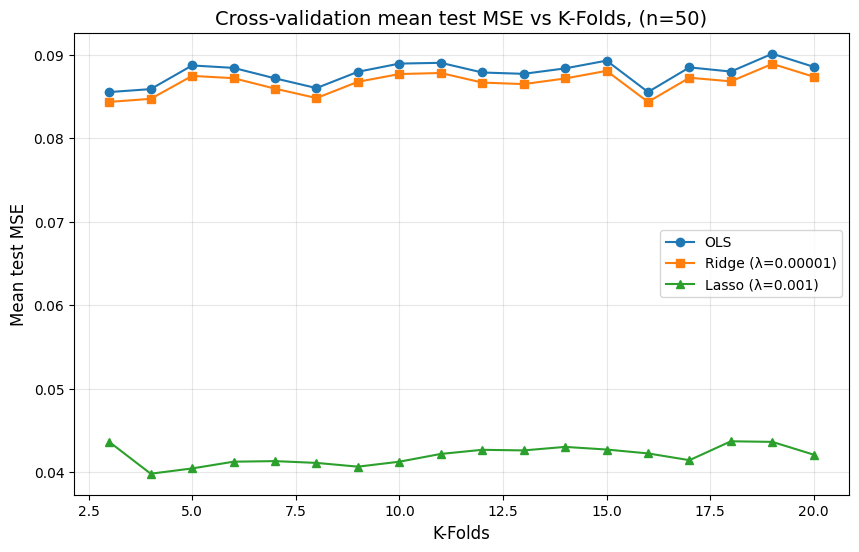

In [30]:
plt.figure(figsize=(10, 6))
plt.plot([r["K-Folds"] for r in res_CV_OLS], [r["test_mse"] for r in res_CV_OLS], 'o-', label='OLS')
plt.plot([r["K-Folds"] for r in res_CV_Ridge], [r["test_mse"] for r in res_CV_Ridge], 's-', label='Ridge (λ=0.00001)')
plt.plot([r["K-Folds"] for r in res_CV_Lasso], [r["test_mse"] for r in res_CV_Lasso], '^-', label='Lasso (λ=0.001)')
plt.xlabel("K-Folds", fontsize=12)
plt.ylabel("Mean test MSE", fontsize=12)
plt.title("Cross-validation mean test MSE vs K-Folds, (n=50)", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()